In [1]:
from utils import *

In [2]:
%matplotlib notebook

In [3]:
mydict = load_data(300,980)
mydict[300].GetLocations().shape[0]

100040

In [4]:
crop_data(mydict,
          min_x=-30, max_x=30,
          min_y=-30, max_y=30,
          min_z=0,max_z=30
         )
mydict[300].GetLocations().shape[0]

10479

In [5]:
data_mat = to_matrix(mydict,'TracerBackground')

In [6]:
data_mat.shape

(10479, 681)

In [7]:
#cov_mat = cov_matrix(data_mat)
#cov_mat = np.matmul(data_mat,data_mat.T)
cov_mat = np.corrcoef(data_mat)
cov_mat.shape

(10479, 10479)

In [8]:
mean_mat = mean_matrix(data_mat)
mean_mat.shape

(10479,)

<IPython.core.display.Javascript object>


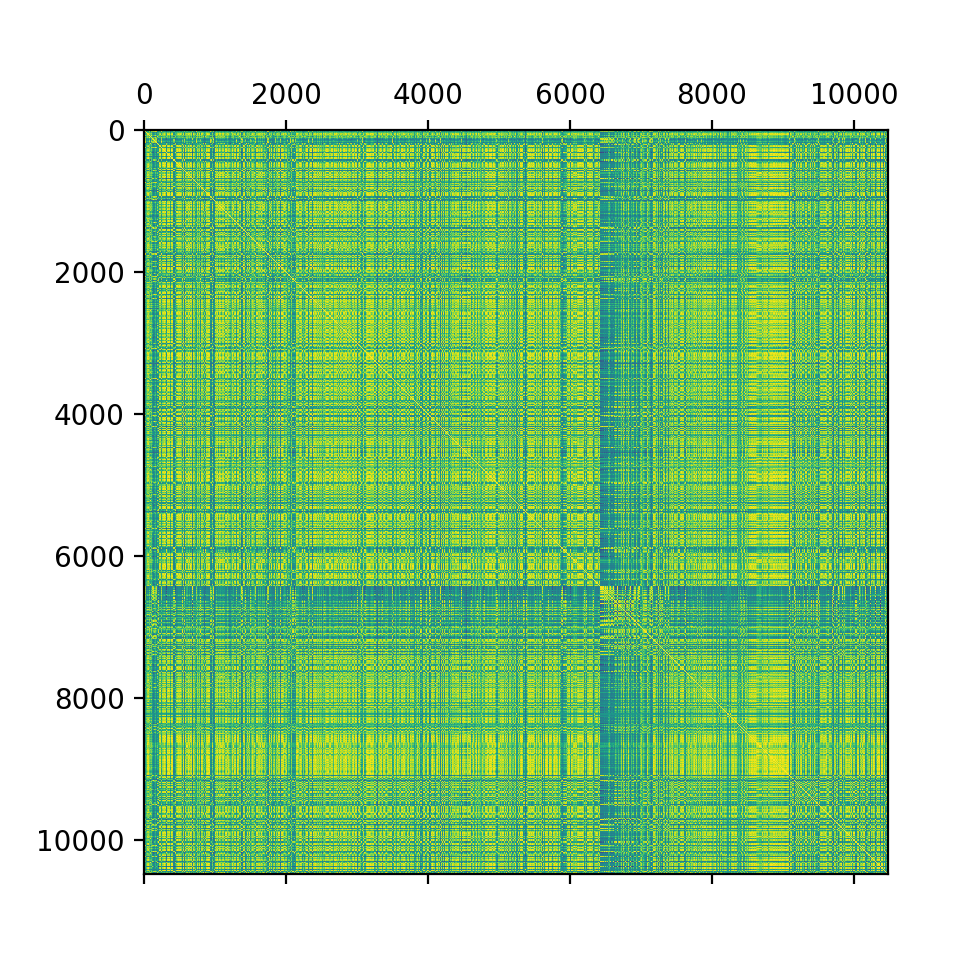

In [9]:
plt.matshow(cov_mat)

In [11]:
mydict[301].GetLocations()

array([[-22.48155403,  14.52016544,  22.32453156],
       [-22.82582855,  17.81914711,  20.32687759],
       [-22.65805244,  14.50700092,  19.80526161],
       ...,
       [-27.47394371,  -2.76046395,  17.02132988],
       [-26.29293633,  -1.89386618,  16.20781326],
       [-26.0652771 ,  -3.50602674,  16.10999298]])

In [12]:
# Select Cov Line with max covariance summed
i_cov_max = 10000#np.argmax(cov_mat.sum(axis=1))
field = np.abs(cov_mat[:,i_cov_max])
cov_thresh = np.quantile(field,0.25)

positions = mydict[301].GetLocations()[:,:]

#Save this line in the vtu file
#mydict[100].AddScalarField('cov_'+str(i_cov_max), cov_i_max)
#mydict[100].Write('SmallSubsetTest.vtu')
closest = np.argsort(field)[:5]


field_selected =  np.array([ field[i]  for i in range(len(field)) if field[i] < cov_thresh  ])
selected = np.array([ [positions[i,0],positions[i,1]]  for i in range(len(field)) if field[i] < cov_thresh  ])
not_selected = np.array([ [positions[i,0],positions[i,1]]  for i in range(len(field)) if field[i] >= cov_thresh  ])

In [13]:
i_cov_max

10000

<IPython.core.display.Javascript object>


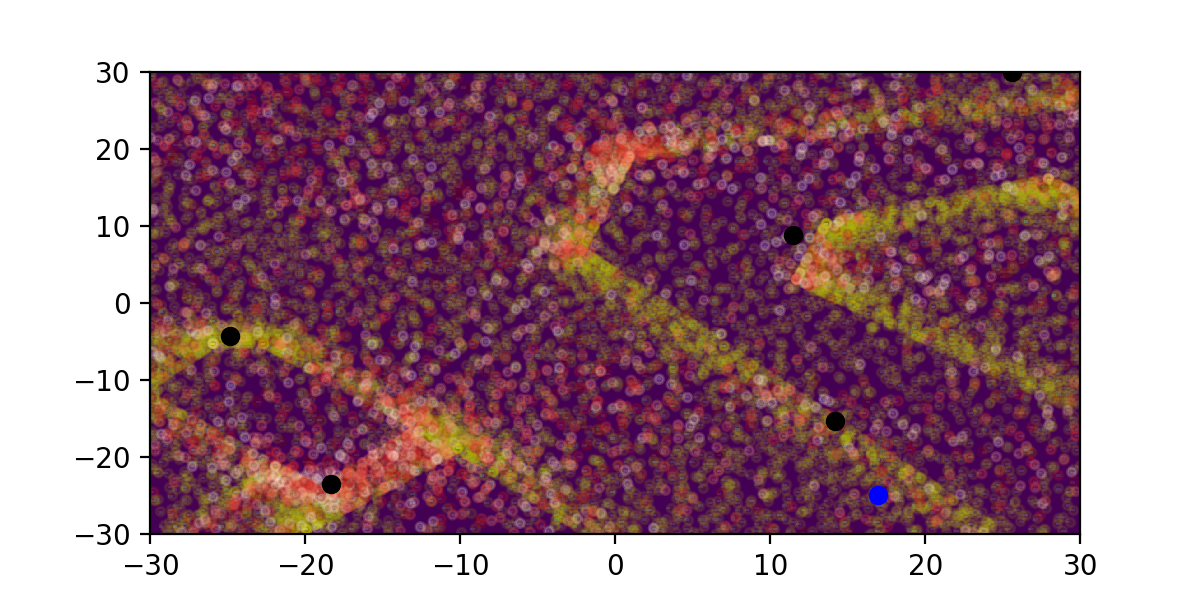

In [14]:
fig = plt.figure(figsize=(6,3))
plt.hist2d(positions[:,0],positions[:,1],bins=200);
plt.scatter(not_selected[:,0],not_selected[:,1],c= 'y',alpha=.1,s=10)
plt.scatter(selected[:,0],selected[:,1],c=-field_selected ,alpha=.2,s=10,cmap='Reds')
plt.scatter(positions[i_cov_max,0],positions[i_cov_max,1],c= 'b',alpha=1)
plt.scatter(positions[closest,0],positions[closest,1],c= 'k',alpha=1)



<IPython.core.display.Javascript object>


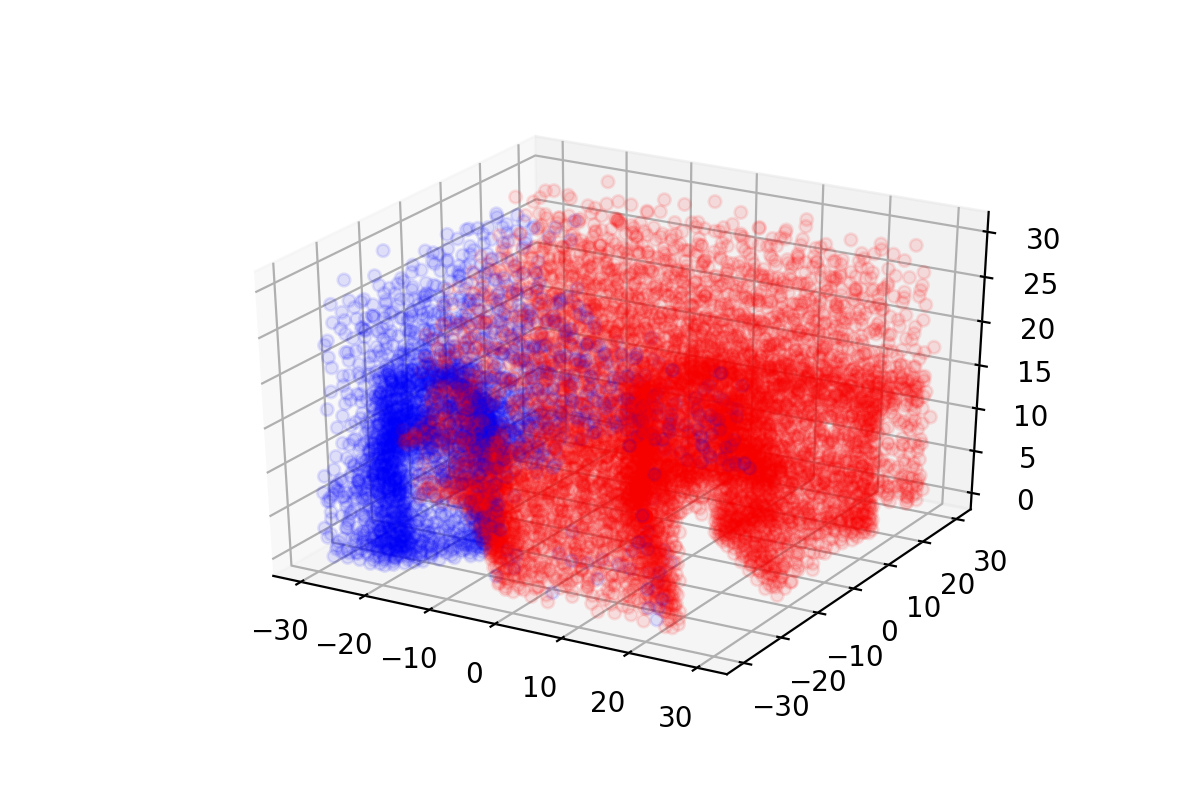

In [110]:
#plot this covariance line
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

color = ['r' if i > cov_thresh  else 'b' for i in field  ]
ax.scatter(positions[:,0],positions[:,1],positions[:,2],c= color,alpha=0.1)
ax.scatter(positions[i_cov_max,0],positions[i_cov_max,1],positions[i_cov_max,2],c= 'r',alpha=1)


<IPython.core.display.Javascript object>


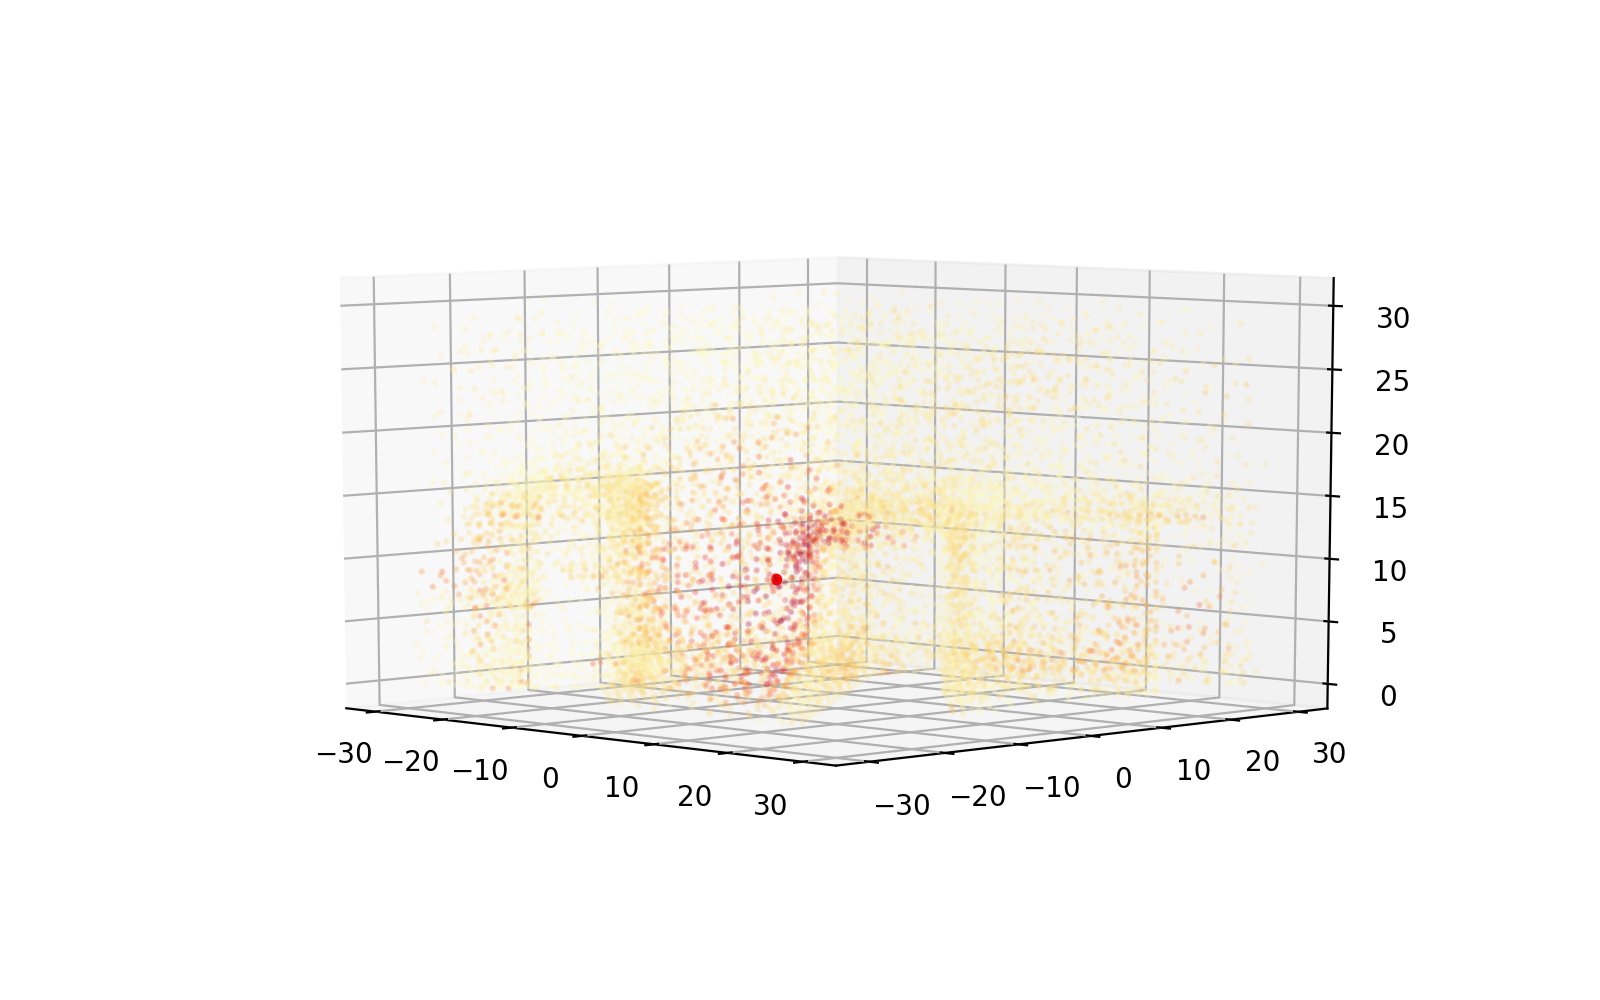

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:,0],positions[:,1],positions[:,2],c=(field-np.min(field))/np.max(field),s=2,cmap='YlOrRd',alpha=0.2)
ax.scatter(positions[i_cov_max,0],positions[i_cov_max,1],positions[i_cov_max,2],c='r',s=10,alpha=1)


In [ ]:
field[i_cov_max]

In [1]:
3**2


9